In [1]:
%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
import scipy.stats as stats

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg_c1', '025deg_c1', '01deg_c1', '1deg_c2', '025deg_c2', '01deg_c2', '1deg_c3', '025deg_c3', '01deg_c3']


In [2]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight", facecolor = 'w')  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

### Function

In [3]:
def correlation():
    df1 = pd.DataFrame({'x':x1, 'y':y1})
    df2 = pd.DataFrame({'x':x2, 'y':y2})
    df3 = pd.DataFrame({'x':x3, 'y':y3})
    # print(df1.x.corr(df1.y))
    # print(df2.x.corr(df2.y))
    # print(df3.x.corr(df3.y))
    r1, p1=stats.pearsonr(df1.x,df1.y)
    r2, p2=stats.pearsonr(df2.x,df2.y)
    r3, p3=stats.pearsonr(df3.x,df3.y)
    a1.append(r1)
    a2.append(r2)
    a3.append(r3)
    b1.append(p1)
    b2.append(p2)
    b3.append(p3)

### 分段平均

In [5]:
def isplit_by_n(ls, n):
    for i in range(0, len(ls), n):
        yield ls[i:i+n]

def split_by_n(ls, n):
    return list(isplit_by_n(ls, n))

In [6]:
dataset1 = pd.read_csv('3.2 IR_value/IR_Aus-NZ(1).csv')
dataset2 = pd.read_csv('3.1 Total upper ocean trans/Transport_Tasman Sea(1).csv')

j = 10

X1 = dataset1.iloc[:, 1].values
X2 = dataset1.iloc[:, 2].values
X3 = dataset1.iloc[:, 3].values
Y1 = dataset2.iloc[:, 1].values
Y2 = dataset2.iloc[:, 2].values
Y3 = dataset2.iloc[:, 3].values

x1 = split_by_n(X1,j)
x1 = [sum(x)/len(x) for x in x1]
x2 = split_by_n(X2,j)
x2 = [sum(x)/len(x) for x in x2]
x3 = split_by_n(X3,j)
x3 = [sum(x)/len(x) for x in x3]
y1 = split_by_n(Y1,j)
y1 = [sum(x)/len(x) for x in y1]
y2 = split_by_n(Y2,j)
y2 = [sum(x)/len(x) for x in y2]
y3 = split_by_n(Y3,j)
y3 = [sum(x)/len(x) for x in y3]

x1 = x1[:-1]
x2 = x2[:-1]
x3 = x3[:-1]
y1 = y1[:-1]
y2 = y2[:-1]
y3 = y3[:-1]
        
a1 = []
a2 = []
a3 = []
b1 = []
b2 = []
b3 = []

correlation()



for i in range(1,21):

    X1 = dataset1.iloc[:-i, 1].values
    X2 = dataset1.iloc[:-i, 2].values
    X3 = dataset1.iloc[:-i, 3].values
    Y1 = dataset2.iloc[i:, 1].values
    Y2 = dataset2.iloc[i:, 2].values
    Y3 = dataset2.iloc[i:, 3].values

    x1 = split_by_n(X1,j)
    x1 = [sum(x)/len(x) for x in x1]
    x2 = split_by_n(X2,j)
    x2 = [sum(x)/len(x) for x in x2]
    x3 = split_by_n(X3,j)
    x3 = [sum(x)/len(x) for x in x3]
    y1 = split_by_n(Y1,j)
    y1 = [sum(x)/len(x) for x in y1]
    y2 = split_by_n(Y2,j)
    y2 = [sum(x)/len(x) for x in y2]
    y3 = split_by_n(Y3,j)
    y3 = [sum(x)/len(x) for x in y3]
    
    if i != 3:
        x1 = x1[:-1]
        x2 = x2[:-1]
        x3 = x3[:-1]
        y1 = y1[:-1]
        y2 = y2[:-1]
        y3 = y3[:-1]
    correlation()
        
        
test1 = pd.DataFrame({'1deg':a1,'025deg':a2,'01deg':a3})

test1.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

print(test1)

round(test1,2).to_csv('3.31 correlation and lags/correlation and lags(' + str(j) + ').csv')



test2 = pd.DataFrame({'1deg':b1,'025deg':b2,'01deg':b3})

test2.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

print(test2)

round(test2,2).to_csv('3.31 p value and lags/p value and lags(' + str(j) + ').csv')

        1deg    025deg     01deg
0  -0.112338  0.031121  0.286695
1  -0.083141  0.059778  0.327094
2  -0.059687  0.109314  0.365920
3  -0.018073  0.163494  0.455637
4  -0.037561  0.300904  0.547335
5  -0.011101  0.321915  0.518114
6   0.007726  0.333947  0.502932
7   0.044810  0.350766  0.536263
8   0.059494  0.351980  0.545887
9   0.064942  0.346560  0.529579
10  0.073140  0.353828  0.550925
11  0.096670  0.387569  0.565869
12  0.083816  0.348960  0.489479
13 -0.012154  0.351987  0.403391
14 -0.055040  0.295076  0.299936
15 -0.069409  0.247848  0.243170
16 -0.080680  0.212991  0.139984
17 -0.108114  0.162794  0.041887
18 -0.141585  0.107024 -0.045951
19 -0.174251  0.046898 -0.152656
20 -0.206072 -0.001300 -0.264450
        1deg    025deg     01deg
0   0.657186  0.902437  0.248730
1   0.742924  0.813727  0.185200
2   0.814008  0.665899  0.135338
3   0.943257  0.516833  0.057402
4   0.886195  0.240553  0.022963
5   0.966271  0.207647  0.033128
6   0.976524  0.190191  0.039613
7   0.8644

### 连续平均

In [23]:
dataset1 = pd.read_csv('3.2 IR_value/IR_Aus-NZ(1).csv')
dataset2 = pd.read_csv('3.1 Total upper ocean trans/Transport_Tasman Sea(1).csv')

for j in range (2,11):
    
    X1 = dataset1.iloc[:, 1].values
    X2 = dataset1.iloc[:, 2].values
    X3 = dataset1.iloc[:, 3].values
    Y1 = dataset2.iloc[:, 1].values
    Y2 = dataset2.iloc[:, 2].values
    Y3 = dataset2.iloc[:, 3].values
    
    w = j
    
    x1 = np.convolve(X1, np.ones(w), 'valid') / w
    x2 = np.convolve(X2, np.ones(w), 'valid') / w
    x3 = np.convolve(X3, np.ones(w), 'valid') / w
    y1 = np.convolve(Y1, np.ones(w), 'valid') / w
    y2 = np.convolve(Y2, np.ones(w), 'valid') / w
    y3 = np.convolve(Y3, np.ones(w), 'valid') / w

    a1 = []
    a2 = []
    a3 = []
    b1 = []
    b2 = []
    b3 = []

    correlation()


    for i in range(1,21):

        X1 = dataset1.iloc[:-i, 1].values
        X2 = dataset1.iloc[:-i, 2].values
        X3 = dataset1.iloc[:-i, 3].values
        Y1 = dataset2.iloc[i:, 1].values
        Y2 = dataset2.iloc[i:, 2].values
        Y3 = dataset2.iloc[i:, 3].values

        x1 = np.convolve(X1, np.ones(w), 'valid') / w
        x2 = np.convolve(X2, np.ones(w), 'valid') / w
        x3 = np.convolve(X3, np.ones(w), 'valid') / w
        y1 = np.convolve(Y1, np.ones(w), 'valid') / w
        y2 = np.convolve(Y2, np.ones(w), 'valid') / w
        y3 = np.convolve(Y3, np.ones(w), 'valid') / w

        correlation()
        
    test = pd.DataFrame({'1deg':a1,'025deg':a2,'01deg':a3})

    test.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

    print(test)

    round(test,2).to_csv('5.3 correlation and lags/correlation and lags (' + str(j) + ').csv')

### Plot

In [99]:
for j in range (2,11):
    
    x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    dataset = pd.read_csv('3.3 correlation and lags/correlation and lag (10).csv')
    y1 = dataset.iloc[:, 1].values
    y2 = dataset.iloc[:, 2].values
    y3 = dataset.iloc[:, 3].values

    plt.figure(figsize(12,8))

    plt.plot(x,y1, label = '1deg')
    plt.plot(x,y2, label = '025deg',linestyle = '--')
    plt.plot(x,y3, label = '01deg',linestyle = ':')

    # plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
    plt.legend(loc=1)                        
    plt.xticks(x)
    plt.title('correlation of IR value and SAM index with lags')
    plt.xlabel('lag')
    plt.ylabel('correlation')

    savefigure('correlation and lag of ' + str(j) + '-year averaged') 

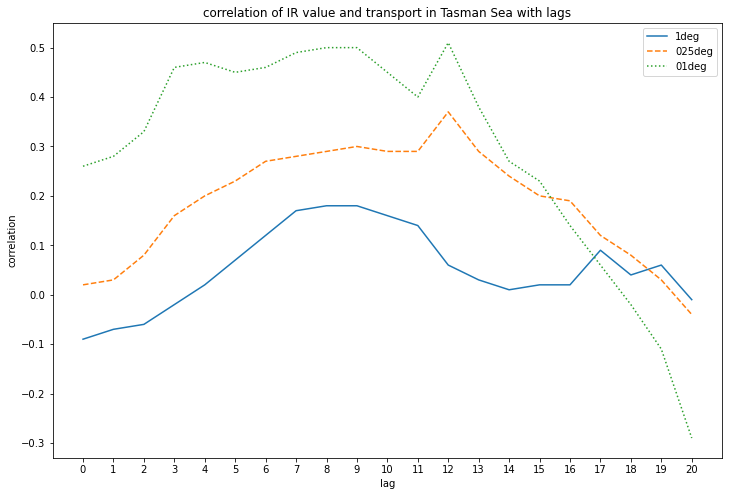